# DATA PREPROCESSING & CLEANNING

## READ AND EXPLORE 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Read crawled data
# We collected the data and uploaded it to GitHub to create a direct CSV link
import pandas as pd

# Attempt to read the CSV file with a specified delimiter and handle bad lines
try:
    data = pd.read_csv("raw_data_mogi2.csv", encoding='utf-8', delimiter=',', on_bad_lines='skip')
    
    # Data Structure: 8 columns with data about rental real estate.
    # The total number of rows in the dataset is 45,000
    # Data Types: All columns in the raw dataset have a data type of string (object)
    data.info()
    print(data)
    
except pd.errors.ParserError as e:
    print("Error parsing CSV file:", e)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85457 entries, 0 to 85456
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       85457 non-null  object
 1   Room Name  85457 non-null  object
 2   Price      85457 non-null  object
 3   Location   85457 non-null  object
 4   Time       85457 non-null  object
 5   Area       85457 non-null  object
 6   Bedrooms   85457 non-null  object
 7   Bathrooms  85457 non-null  object
dtypes: object(8)
memory usage: 5.2+ MB
            Type                                          Room Name  \
0          House  Trọ CHÍNH CHỦ gần Ngã 4 Hàng Xanh, HUTECH, HỒN...   
1          House  Trọ có gác, AN NINH, CHÍNH CHỦ, gần đường Trườ...   
2          House  Căn Hộ CHÍNH CHỦ MỚI gần sân bay TÂN SƠN NHẤT,...   
3          House  KHAI TRƯƠNG phòng mới Giá rẻ Ngay Gần Đại Học ...   
4          House  CĂN HỘ CAO CẤP 70M2, 02 Phòng Ngủ, Thang Máy, ...   
...          ...                    

# PROCESS DATA

## CLEANING "NO INFORMATION VALUE"

In [2]:
# process missing and 'No Information' value
# Replace 'No Information' with NaN value
data.replace('No Information', pd.NA, inplace=True)
# Now drop rows with any NaN values
data.dropna(inplace=True)
data

,Type,Room Name,Price,Location,Time,Area,Bedrooms,Bathrooms
0,House,"Trọ CHÍNH CHỦ gần Ngã 4 Hàng Xanh, HUTECH, HỒN...",3 triệu,"Huyện Nhà Bè, TPHCM",Hôm nay,15 m2,0 PN,0 WC
1,House,"Trọ có gác, AN NINH, CHÍNH CHỦ, gần đường Trườ...",26 triệu,"Quận 2 (TP. Thủ Đức), TPHCM",Hôm nay,18 m2,0 PN,0 WC
2,House,"Căn Hộ CHÍNH CHỦ MỚI gần sân bay TÂN SƠN NHẤT,...",150 triệu,"Quận 2 (TP. Thủ Đức), TPHCM",Hôm nay,23 m2,0 PN,0 WC
3,House,KHAI TRƯƠNG phòng mới Giá rẻ Ngay Gần Đại Học ...,35 triệu,"Quận 2 (TP. Thủ Đức), TPHCM",Hôm nay,25 m2,0 PN,0 WC
4,House,"CĂN HỘ CAO CẤP 70M2, 02 Phòng Ngủ, Thang Máy, ...",50 triệu,"Quận 2 (TP. Thủ Đức), TPHCM",Hôm nay,70 m2,2 PN,1 WC
...,...,...,...,...,...,...,...,...
85452,Apartment,Giá sốc cho căn hộ 1 phòng ngủ ưu đãi lớn🔥🔥,5 triệu,"Quận Gò Vấp, TPHCM",Hôm nay,35 m2,1 PN,1 WC
85453,Apartment,Căn hộ FULL tiện nghi Đ 3/2 Q10 gần dh Kinh Tế...,4 triệu,"Quận Tân Phú, TPHCM",Hôm nay,35 m2,1 PN,1 WC
85454,Apartment,"🌿Căn Hộ Siêu Thoáng Lý Thái Tổ, Chỉ SÁCH VALI ...",11 triệu,"Quận Bình Thạnh, TPHCM",Hôm nay,30 m2,1 PN,1 WC
85455,Apartment,💥 Siêu Phẩm Studio Máy Giặt Riêng Ngay Trung T...,7 triệu,"Quận Tân Bình, TPHCM",Hôm nay,35 m2,1 PN,1 WC


 ## CONVERT “PRICE” COLUMN INTO INTEGER TYPE

In [3]:
# Function to convert price value to an integer
def convert_price_to_int(price_str):
    # Ensure the input is a string
    if isinstance(price_str, str):
        # Remove 'đ' (Vietnamese currency symbol), dots, and commas
        price_str = price_str.replace('đ', '').replace('.', '').replace(',', '')
        
        # Split the string by spaces to separate parts like 'triệu' (million), 'nghìn' (thousand), etc.
        parts = price_str.split()
        
        # Initialize the total price
        total_price = 0
        
        # Conversion factors
        conversion_factors = {
            'tỷ': 1000000000,  # billion
            'triệu': 1000000,  # million
            'nghìn': 1000      # thousand
        }
        
        # Temporary value to hold the current number
        current_value = 0
        
        for part in parts:
            if part.isdigit():
                # If the part is a number, update the current value
                current_value = int(part)
            elif part in conversion_factors:
                # If the part is a unit (triệu, tỷ, nghìn), multiply the current value by the corresponding factor
                total_price += current_value * conversion_factors[part]
                current_value = 0
        
        # Add any remaining value
        total_price += current_value
        
        return total_price
    
    # Return 0 if the input is not a string
    return 0

# Ensure the 'Price' column values are treated as strings and apply the conversion function
data['Price'] = data['Price'].astype(str).apply(convert_price_to_int)
print(data[['Price']])


           Price
0        3000000
1       26000000
2      150000000
3       35000000
4       50000000
...          ...
85452    5000000
85453    4000000
85454   11000000
85455    7000000
85456    6900000

[85457 rows x 1 columns]


## CONVERT STRING VALUE INTO INTEGER TYPE

In [4]:
# Convert value with a string into an integer number
# Define a function to remove non-numeric characters and convert to numeric
def clean_string_and_convert(column):
    # Ensure the column is treated as string
    numeric_column = data[column].astype(str).str.split(" ").str[0]
    # Convert the first part to an integer
    numeric_column = pd.to_numeric(numeric_column, errors='coerce').fillna(0).astype(int)
    return numeric_column

# Apply the function to the specific columns
# Using .astype(int) to convert all columns to integer type
data['Area'] = clean_string_and_convert('Area')
data['Bedrooms'] = clean_string_and_convert('Bedrooms')
data['Bathrooms'] = clean_string_and_convert('Bathrooms')

print(data[['Area', 'Bedrooms', 'Bathrooms']])


       Area  Bedrooms  Bathrooms
0        15         0          0
1        18         0          0
2        23         0          0
3        25         0          0
4        70         2          1
...     ...       ...        ...
85452    35         1          1
85453    35         1          1
85454    30         1          1
85455    35         1          1
85456    40         1          1

[85457 rows x 3 columns]


## REMOVE “TPHCM” FROM THE “Location” COLUMN

In [5]:
 # Remove the value 'TPHCM' from the 'Location' column
data['Location'] = data['Location'].str.replace(', TPHCM', '')
data['Location'].unique()

array(['Huyện Nhà Bè', 'Quận 2 (TP. Thủ Đức)', 'Quận 9 (TP. Thủ Đức)',
       'Quận 7', 'Quận 4', 'Quận Bình Thạnh', 'Quận 10', 'Quận Tân Bình',
       'Quận 1', 'Quận Tân Phú', 'Quận Phú Nhuận', 'Quận 3',
       'Quận Bình Tân', 'Quận Thủ Đức (TP. Thủ Đức)', 'Quận 5', 'Quận 11',
       'Quận Gò Vấp', 'Quận 12', 'Quận 6', 'Quận 8', 'Huyện Hóc Môn',
       'Huyện Bình Chánh', 'Huyện Củ Chi', 'Location'], dtype=object)

## CONVER “PRICE” UNIT TO MILION

In [6]:
# For easy processing and analysis
# Convert Price unit to Milion

data [['Price']] = data [['Price']]/1000000
data [['Price']]

,Price
0,3.0
1,26.0
2,150.0
3,35.0
4,50.0
...,...
85452,5.0
85453,4.0
85454,11.0
85455,7.0


## UPDATE TIME

In [7]:
from datetime import datetime, timedelta

# Process Time column with 'Hôm nay', 'Hôm qua' values
current_date = datetime.today()

def convert_time(time_str):
    if time_str == 'Hôm nay': 
        return current_date.strftime('%d/%m/%Y')
    if time_str == 'Hôm qua': 
        return (current_date - timedelta(days=1)).strftime('%d/%m/%Y')
    else: 
        return time_str  # return time_str with .strftime('%d/%m/%Y')

# Apply the function to the 'Time' column
data['Time'] = data['Time'].apply(convert_time)
print(data[['Time']])

             Time
0      01/06/2024
1      01/06/2024
2      01/06/2024
3      01/06/2024
4      01/06/2024
...           ...
85452  01/06/2024
85453  01/06/2024
85454  01/06/2024
85455  01/06/2024
85456  01/06/2024

[85457 rows x 1 columns]


## REMOVE OUTLINERS BY USING IQR

In [8]:
# Remove outliers using Inter Quartile Range (IQR)
Q1_price, Q3_price = data['Price'].quantile([0.15, 0.85])
IQR_price = Q3_price - Q1_price
Q1_area, Q3_area = data['Area'].quantile([0.15, 0.85])
IQR_area = Q3_area - Q1_area

# Determining bounds for 'Price' and 'Area'
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

# Processing bedroom data using IQR
Q1_bedrooms, Q3_bedrooms = data['Bedrooms'].quantile([0.15, 0.85])
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

# Processing bathroom data using IQR
Q1_bathrooms, Q3_bathrooms = data['Bathrooms'].quantile([0.15, 0.85])
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

# Filtering out the outliers for Price, Area, Bedrooms, and Bathrooms
filtered_data = data[
    (data['Price'] >= lower_bound_price) & (data['Price'] <= upper_bound_price) &
    (data['Area'] >= lower_bound_area) & (data['Area'] <= upper_bound_area) &
    (data['Bedrooms'] <= upper_bound_bedrooms) &
    (data['Bathrooms'] <= upper_bound_bathrooms)
]

# Displaying the shape of the original and filtered dataset
original_shape = data.shape
filtered_shape = filtered_data.shape

# Show the shape of the original and filtered dataset
print(f"Original dataset shape: {original_shape}")
print(f"Filtered dataset shape: {filtered_shape}")


Original dataset shape: (85457, 8)
Filtered dataset shape: (77809, 8)


## SAVE CLEANED DATA TO CSV

In [9]:
#Save cleaned data to csv
filtered_data.to_csv("cleaned_data.csv", index=False)
data

,Type,Room Name,Price,Location,Time,Area,Bedrooms,Bathrooms
0,House,"Trọ CHÍNH CHỦ gần Ngã 4 Hàng Xanh, HUTECH, HỒN...",3.0,Huyện Nhà Bè,01/06/2024,15,0,0
1,House,"Trọ có gác, AN NINH, CHÍNH CHỦ, gần đường Trườ...",26.0,Quận 2 (TP. Thủ Đức),01/06/2024,18,0,0
2,House,"Căn Hộ CHÍNH CHỦ MỚI gần sân bay TÂN SƠN NHẤT,...",150.0,Quận 2 (TP. Thủ Đức),01/06/2024,23,0,0
3,House,KHAI TRƯƠNG phòng mới Giá rẻ Ngay Gần Đại Học ...,35.0,Quận 2 (TP. Thủ Đức),01/06/2024,25,0,0
4,House,"CĂN HỘ CAO CẤP 70M2, 02 Phòng Ngủ, Thang Máy, ...",50.0,Quận 2 (TP. Thủ Đức),01/06/2024,70,2,1
...,...,...,...,...,...,...,...,...
85452,Apartment,Giá sốc cho căn hộ 1 phòng ngủ ưu đãi lớn🔥🔥,5.0,Quận Gò Vấp,01/06/2024,35,1,1
85453,Apartment,Căn hộ FULL tiện nghi Đ 3/2 Q10 gần dh Kinh Tế...,4.0,Quận Tân Phú,01/06/2024,35,1,1
85454,Apartment,"🌿Căn Hộ Siêu Thoáng Lý Thái Tổ, Chỉ SÁCH VALI ...",11.0,Quận Bình Thạnh,01/06/2024,30,1,1
85455,Apartment,💥 Siêu Phẩm Studio Máy Giặt Riêng Ngay Trung T...,7.0,Quận Tân Bình,01/06/2024,35,1,1


# DATA ANALYSIS

 ## SET UP LIBRARIES AND PREVIEW DATA

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#cleaned file from direct link in github
clean_data = pd.read_csv("cleaned_data.csv")

In [11]:
#Preview data
clean_data.head(10)

,Type,Room Name,Price,Location,Time,Area,Bedrooms,Bathrooms
0,House,"Trọ CHÍNH CHỦ gần Ngã 4 Hàng Xanh, HUTECH, HỒN...",3.0,Huyện Nhà Bè,01/06/2024,15,0,0
1,House,"Trọ có gác, AN NINH, CHÍNH CHỦ, gần đường Trườ...",26.0,Quận 2 (TP. Thủ Đức),01/06/2024,18,0,0
2,House,"Căn Hộ CHÍNH CHỦ MỚI gần sân bay TÂN SƠN NHẤT,...",150.0,Quận 2 (TP. Thủ Đức),01/06/2024,23,0,0
3,House,KHAI TRƯƠNG phòng mới Giá rẻ Ngay Gần Đại Học ...,35.0,Quận 2 (TP. Thủ Đức),01/06/2024,25,0,0
4,House,"CĂN HỘ CAO CẤP 70M2, 02 Phòng Ngủ, Thang Máy, ...",50.0,Quận 2 (TP. Thủ Đức),01/06/2024,70,2,1
5,House,"Trọ CHÍNH CHỦ ngay LÊ VĂN VIỆT, Lã Xuân Oai Có...",45.0,Quận 2 (TP. Thủ Đức),01/06/2024,28,0,0
6,House,Nhà đẹp nguyên căn ở Nhơn Đức Nhà Bè,35.0,Quận 2 (TP. Thủ Đức),01/06/2024,30,2,1
7,House,Cho thuê nhà mặt tiền đường 19 - Trần Não Quận...,55.0,Quận 9 (TP. Thủ Đức),01/06/2024,75,7,7
8,House,Cho thuê nhà Khu Lương Định Của Q2 💥gần trường...,100.0,Quận 2 (TP. Thủ Đức),01/06/2024,80,0,0
9,House,Cho thuê nhà mặt tiền Chợ Khu Phước Bình Quận ...,35.0,Quận 9 (TP. Thủ Đức),01/06/2024,164,6,5


# STATISTICS 

## BAR CHART ILLUSTRATING THE AVERAGE PRICE BY ACCOMODATION TYPE

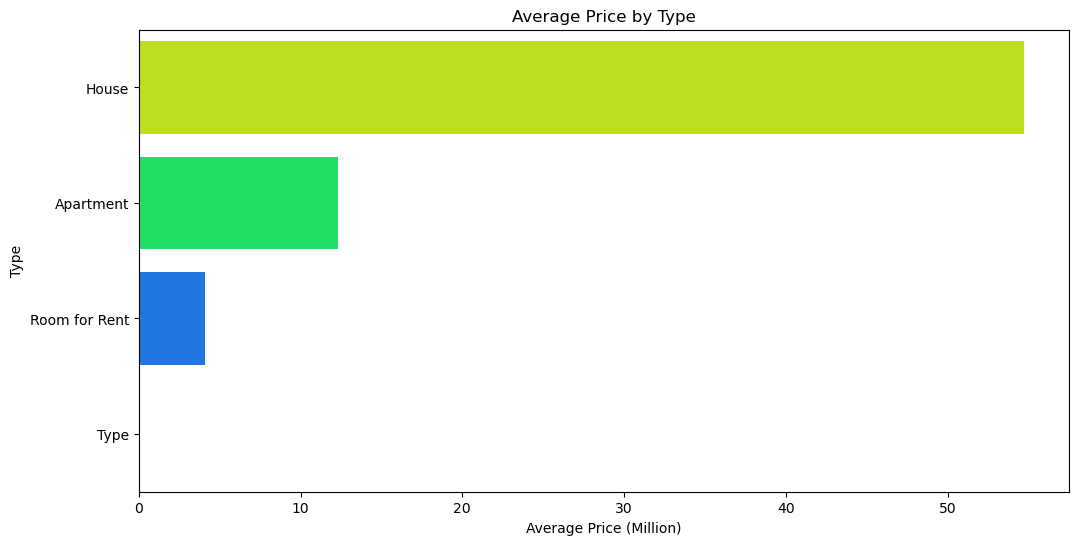

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average price by 'Type'
average_price_by_type = clean_data.groupby('Type')['Price'].mean().reset_index()

# Sort the data by average price in descending order
sorted_data = average_price_by_type.sort_values(by='Price', ascending=False)

# Create a color palette with different colors for each bar
colors = sns.color_palette('hsv', len(sorted_data))

# Create a bar plot with different colors for each bar
plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Type', data=sorted_data, palette=colors)
plt.title('Average Price by Type')
plt.xlabel('Average Price (Million)')
plt.ylabel('Type')
plt.show()

## VIOLIN AND BAR CHART SHOWING THE DOMANT DISTRIBUTION OF “PRICE,” “AREA,” “BEDROOMS,” AND ”BATHROOM

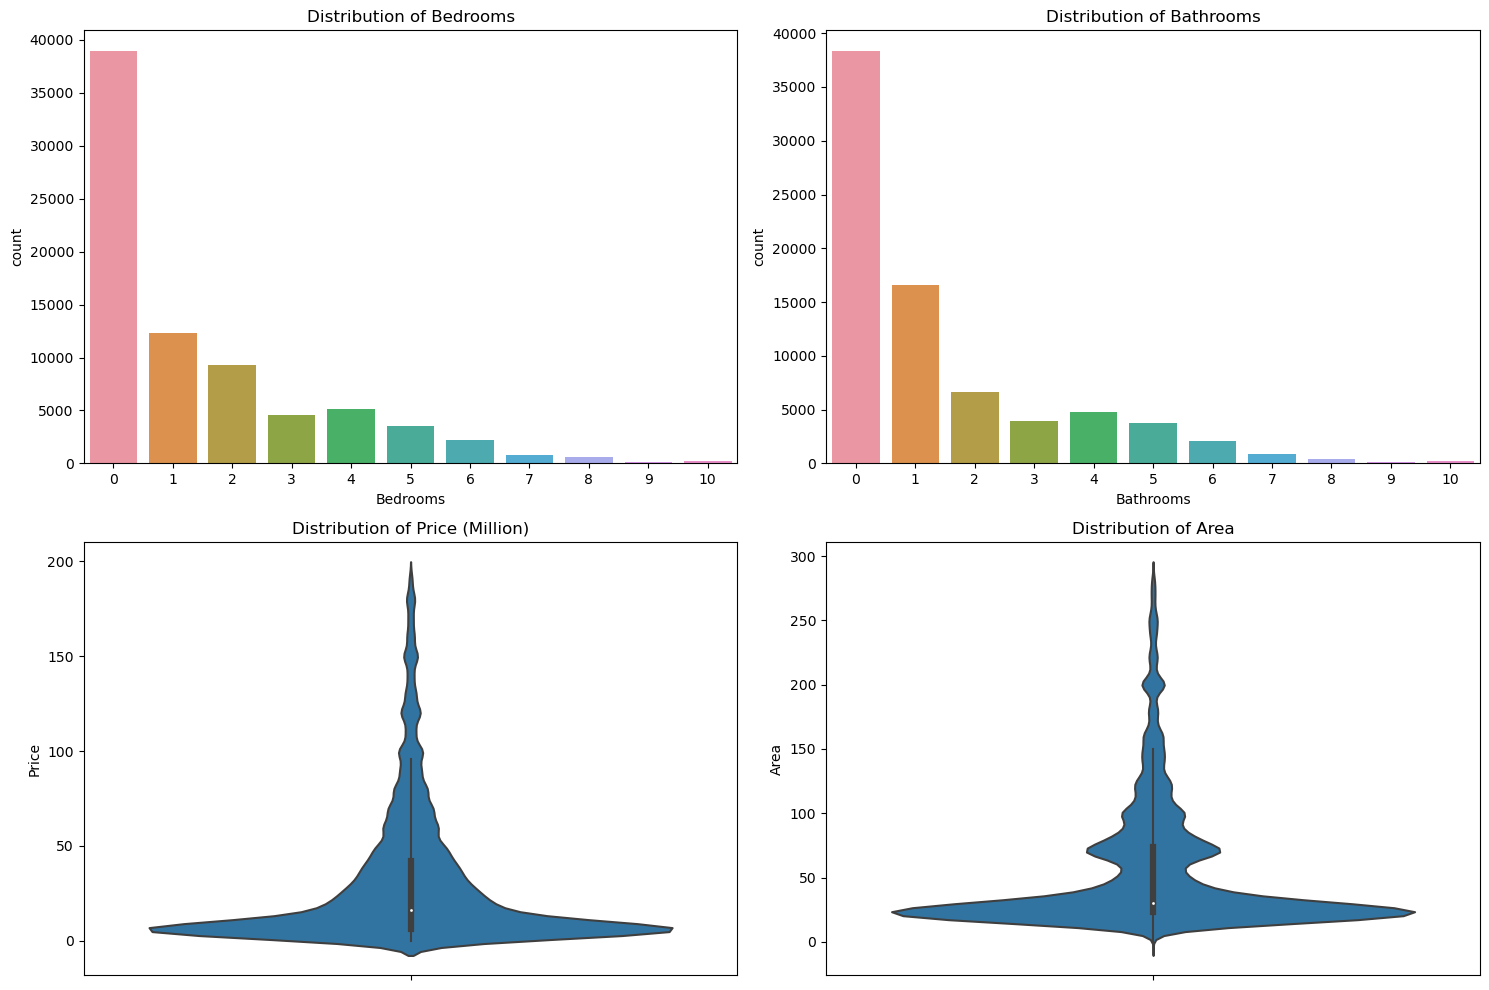

In [13]:
# Correcting the axes titles for Bedrooms and Bathrooms plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Plotting distribution of 'Bedrooms'
sns.countplot(x='Bedrooms', data=clean_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Bedrooms')
# Plotting distribution of 'Bathrooms'
sns.countplot(x='Bathrooms', data=clean_data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Bathrooms')
# Violin plot for 'Price'
sns.violinplot(data=clean_data, y='Price', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Price (Million)')
# Violin plot for 'Area'
sns.violinplot(data=clean_data, y='Area', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Area')
# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## COMBINED BAR AND LINE CHART DEPICTING TOTAL AND AVERAGE AREA RENT BY LOCATION

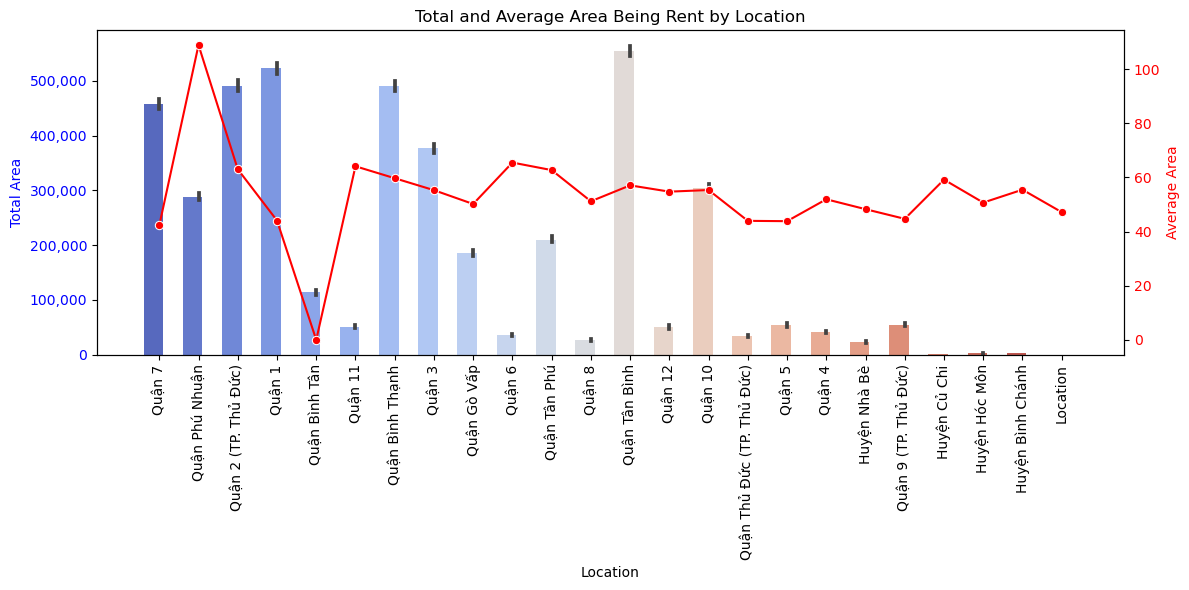

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sort data by decreasing area
sorted_data = clean_data.sort_values(by='Area', ascending=False)

# Calculate the mean area for each location
mean_area_by_location = sorted_data.groupby('Location')['Area'].mean().reset_index()

# Create a figure and the first subplot (for average)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define a custom color palette for the bar chart
custom_palette = sns.color_palette("coolwarm", len(sorted_data['Location'].unique()))

# Bar plot for total area (left y-axis)
sns.barplot(x='Location', y='Area', data=sorted_data, estimator=sum, ax=ax1, palette=custom_palette)
ax1.set_xlabel('Location')
ax1.set_ylabel('Total Area', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second subplot (for average)
ax2 = ax1.twinx()

# Line plot for average area (right y-axis)
sns.lineplot(x=mean_area_by_location['Location'], y=mean_area_by_location['Area'], ax=ax2, color='r', marker='o')
ax2.set_ylabel('Average Area', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate x-axis labels for better readability (vertical)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='center')

# Format the left y-axis (total area) to display specific values
def format_y_axis(value, _):
    return f'{int(value):,}'

ax1.yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Increase the width of each bar
for bar in ax1.patches:
    bar.set_width(0.5)

# Rotate x-axis labels for better readability (vertical)
plt.title('Total and Average Area Being Rent by Location')
plt.tight_layout()
plt.show()


## COMBINED BAR AND LINE CHART SHOWING TOTAL AND AVERAGE PRICE RENT BY LOCATION

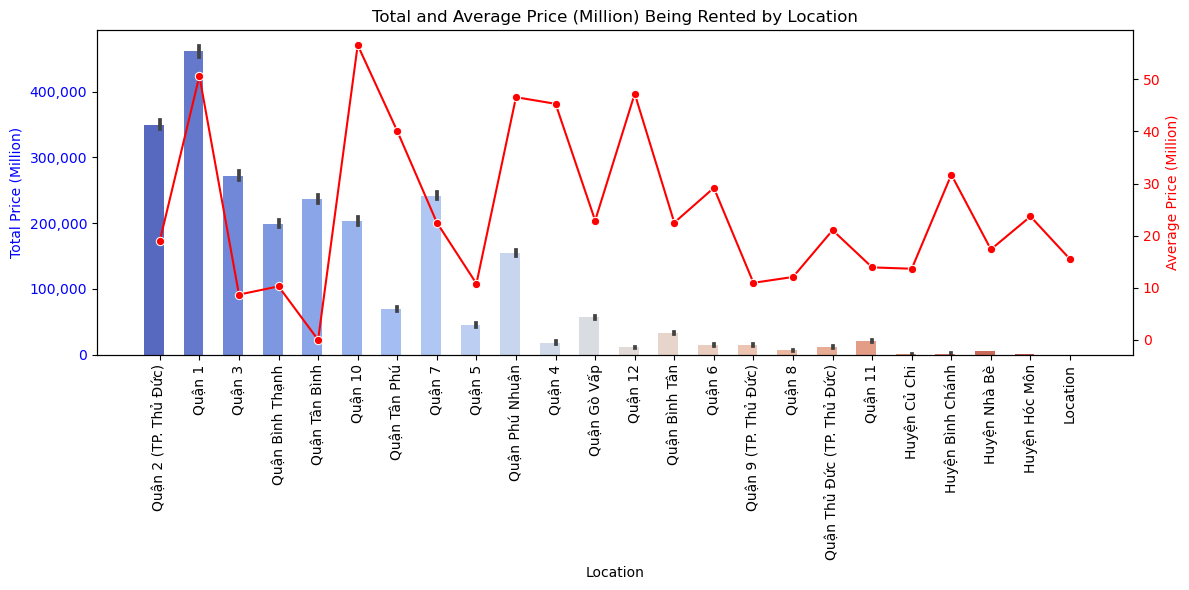

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sort data by decreasing price
sorted_data = clean_data.sort_values(by='Price', ascending=False)

# Calculate the mean price for each location
mean_area_by_location = sorted_data.groupby('Location')['Price'].mean().reset_index()

# Create a figure and the first subplot (for average)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define a custom color palette for the bar chart
custom_palette = sns.color_palette("coolwarm", len(sorted_data['Location'].unique()))

# Bar plot for total price (left y-axis)
sns.barplot(x='Location', y='Price', data=sorted_data, estimator=sum, ax=ax1, palette=custom_palette)
ax1.set_xlabel('Location')
ax1.set_ylabel('Total Price (Million)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second subplot (for average)
ax2 = ax1.twinx()

# Line plot for average price (right y-axis)
sns.lineplot(x=mean_area_by_location['Location'], y=mean_area_by_location['Price'], ax=ax2, color='r', marker='o')
ax2.set_ylabel('Average Price (Million)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate x-axis labels for better readability (vertical)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='center')

# Format the left y-axis (total price) to display specific values
def format_y_axis(value, _):
    return f'{int(value):,}'

ax1.yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Increase the width of each bar
for bar in ax1.patches:
    bar.set_width(0.5)

# Title and layout adjustments
plt.title('Total and Average Price (Million) Being Rented by Location')
plt.tight_layout()
plt.show()


## HEATMAP SHOWING THE CORRELATIONS OF DATA FEATURES FOR MACHINE LEARNING PURPOSES

In [16]:
from sklearn.preprocessing import LabelEncoder
# Initialize a LabelEncoder object
label_encoder = LabelEncoder()
# Use LabelEncoder to convert 'Type' column to numeric
clean_data['Type_encoded'] = label_encoder.fit_transform(clean_data['Type'])
clean_data['Location_encoded'] = label_encoder.fit_transform(clean_data['Location'])
clean_data[['Type','Type_encoded','Location','Location_encoded']]

,Type,Type_encoded,Location,Location_encoded
0,House,1,Huyện Nhà Bè,3
1,House,1,Quận 2 (TP. Thủ Đức),9
2,House,1,Quận 2 (TP. Thủ Đức),9
3,House,1,Quận 2 (TP. Thủ Đức),9
4,House,1,Quận 2 (TP. Thủ Đức),9
...,...,...,...,...
77804,Apartment,0,Quận Gò Vấp,19
77805,Apartment,0,Quận Tân Phú,23
77806,Apartment,0,Quận Bình Thạnh,17
77807,Apartment,0,Quận Tân Bình,22


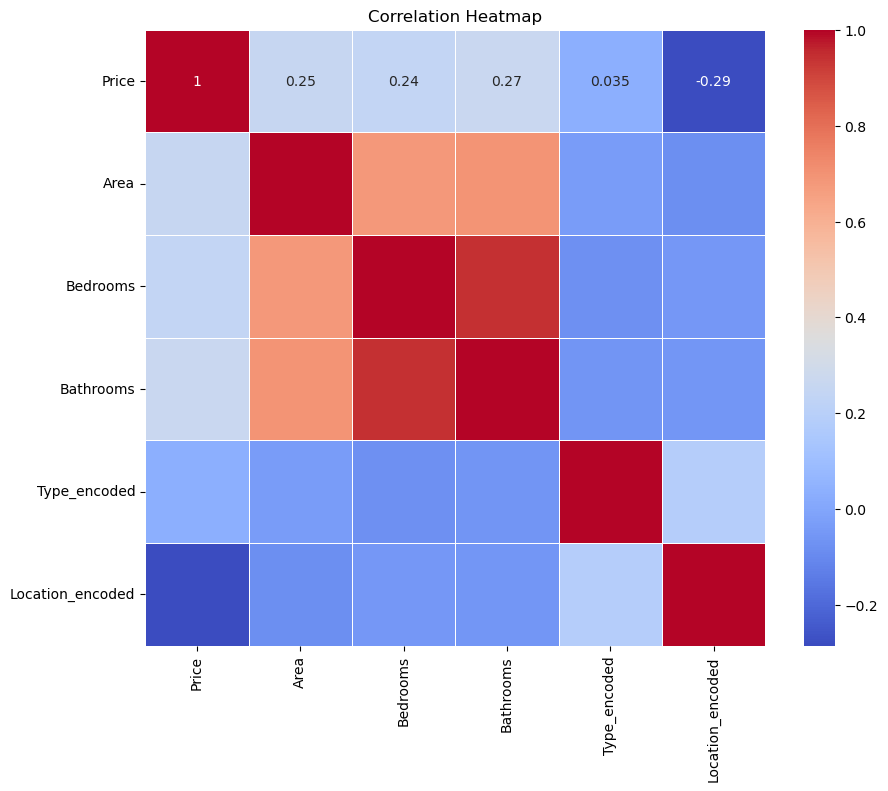

In [17]:
# Select only numeric columns
numeric_columns = clean_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# USING MACHINE LEARNING AND STANDARD ECONOMETRIC METHOD TO ANALYSIS

## COMPARE THREE MODELS LINEAR REGRESSION, RANDOMFOREST AND MOVING AVERAGE TO PREDICT HOUSE PRICES BASED ON ‘AREA’, ‘BEDROOMS’, ‘BATHROOMS’


### LINEAR REGRESSION

Size of X: (77809, 3)
Size of X_train: (62247, 3)
Size of X_test: (15562, 3)
Size of X_test: (15562, 3)
       Actual Price  Predicted Price Actual Price Category  \
36747           4.5        23.513741                   Low   
11652          38.0        23.513741                   Low   
23615           4.5        23.829982                   Low   
49423          45.0        26.317267                   Low   
26495          12.0        30.006740                   Low   
...             ...              ...                   ...   
34670           3.5        23.513741                   Low   
51396          85.0        23.302914                   Low   
4593           80.0        52.240807                   Low   
42125           3.5        24.567876                   Low   
46822          50.0        22.986674                   Low   

      Predicted Price Category           Type        Time  Bedrooms  \
36747                      Low  Room for Rent  18/01/2024         0   
11652    

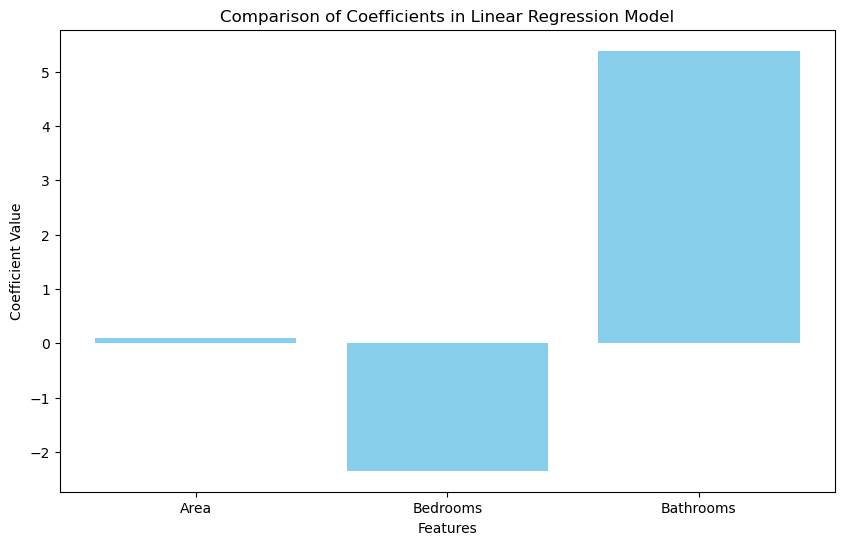

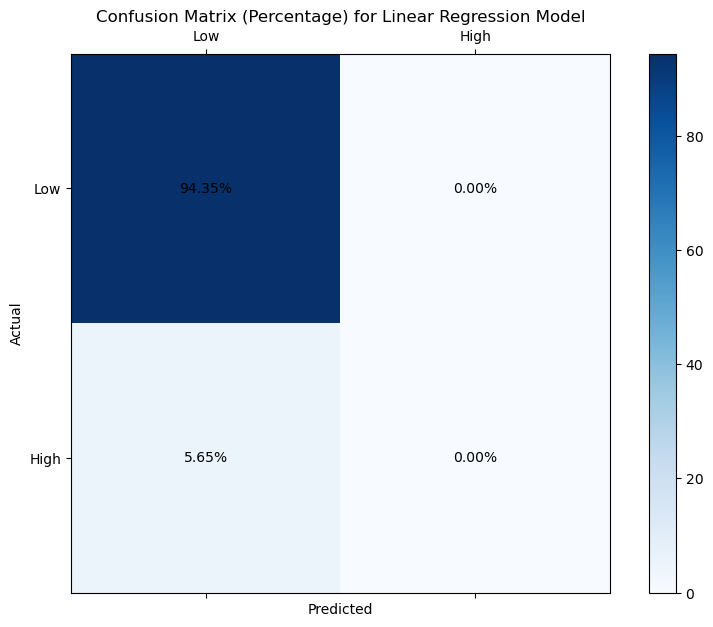

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Giả sử clean_data là DataFrame đã được làm sạch
clean_data = pd.read_csv('cleaned_data.csv')

# Xử lý các giá trị NaN bằng cách loại bỏ các hàng chứa NaN
clean_data.dropna(inplace=True)

# Chọn các đặc trưng (features) - bỏ các biến 'Location' và 'Type'
X = clean_data[['Area', 'Bedrooms', 'Bathrooms']]

# Chọn biến mục tiêu (target)
y = clean_data['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kích thước của X = X_train + X_test
print("Size of X:", X.shape)
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)

# Tạo mô hình hồi quy tuyến tính
linear_regression_model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
linear_regression_model.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred = linear_regression_model.predict(X_test)

# Chuyển đổi giá trị thực tế và giá trị dự đoán thành các categories Low và High
threshold = 100  # Ngưỡng để chia thành hai nhóm, thay đổi giá trị này cho phù hợp với dữ liệu của bạn
price_labels = ['Low', 'High']
y_test_binned = pd.cut(y_test, bins=[-np.inf, threshold, np.inf], labels=price_labels)
y_pred_binned = pd.cut(y_pred, bins=[-np.inf, threshold, np.inf], labels=price_labels)

# Tạo DataFrame với các giá trị thực tế, giá trị dự đoán, 'Type', 'Time', 'Bedrooms', 'Bathrooms', và 'Area'
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Actual Price Category': y_test_binned,
    'Predicted Price Category': y_pred_binned,
    'Type': clean_data.loc[X_test.index, 'Type'].values,
    'Time': clean_data.loc[X_test.index, 'Time'].values,
    'Bedrooms': X_test['Bedrooms'].values,
    'Bathrooms': X_test['Bathrooms'].values,
    'Area': X_test['Area'].values
})

# In kích thước của X_test
print("Size of X_test:", X_test.shape)

# In DataFrame chứa giá trị thực tế, giá trị dự đoán, 'Type', 'Time', 'Bedrooms', 'Bathrooms', và 'Area'
print(results_df)

# Đánh giá mô hình bằng các chỉ số như RMSE và R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error (RMSE) for Linear Regression on Test Data:", rmse)
print("R-squared (R2) for Linear Regression on Test Data:", r2)

# Đánh giá mô hình bằng các chỉ số như accuracy, precision, recall, và F1-score trên categories
accuracy = accuracy_score(y_test_binned, y_pred_binned) * 100
precision = precision_score(y_test_binned, y_pred_binned, average='weighted') * 100
recall = recall_score(y_test_binned, y_pred_binned, average='weighted') * 100
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted') * 100

print("Accuracy for LinearRegression on Test Data (Categories):", accuracy, "%")
print("Precision for LinearRegression on Test Data (Categories):", precision, "%")
print("Recall for LinearRegression on Test Data (Categories):", recall, "%")
print("F1-score for LinearRegression on Test Data (Categories):", f1, "%")

# Xuất ra các hệ số của mô hình hồi quy tuyến tính
coefficients = linear_regression_model.coef_
intercept = linear_regression_model.intercept_

print("Coefficients for Linear Regression model:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")
print(f"Intercept: {intercept}")

# Vẽ biểu đồ so sánh các hệ số
plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients in Linear Regression Model')
plt.show()

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned, labels=price_labels)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp

conf_matrix_percent = np.array([[tn, fp], [fn, tp]]) / total * 100

# Vẽ ma trận nhầm lẫn theo FN FP TN TP và theo %
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_percent, cmap=plt.cm.Blues)
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(conf_matrix_percent):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center')

ax.set_xticklabels([''] + price_labels)
ax.set_yticklabels([''] + price_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage) for Linear Regression Model')
plt.show()


### RANDOM FOREST

Size of X: (77809, 3)
Size of X_train: (62247, 3)
Size of X_test: (15562, 3)
Size of X_test: (15562, 3)
       Actual Price  Predicted Price Actual Price Category  \
36747           4.5        30.831272                   Low   
11652          38.0        30.831272                   Low   
23615           4.5        30.671855                   Low   
49423          45.0        24.136209                   Low   
26495          12.0        12.053408                   Low   
...             ...              ...                   ...   
34670           3.5        30.831272                   Low   
51396          85.0        31.309943                   Low   
4593           80.0        47.602166                   Low   
42125           3.5         4.082841                   Low   
46822          50.0        30.520651                   Low   

      Predicted Price Category           Type        Time  Bedrooms  \
36747                      Low  Room for Rent  18/01/2024         0   
11652    

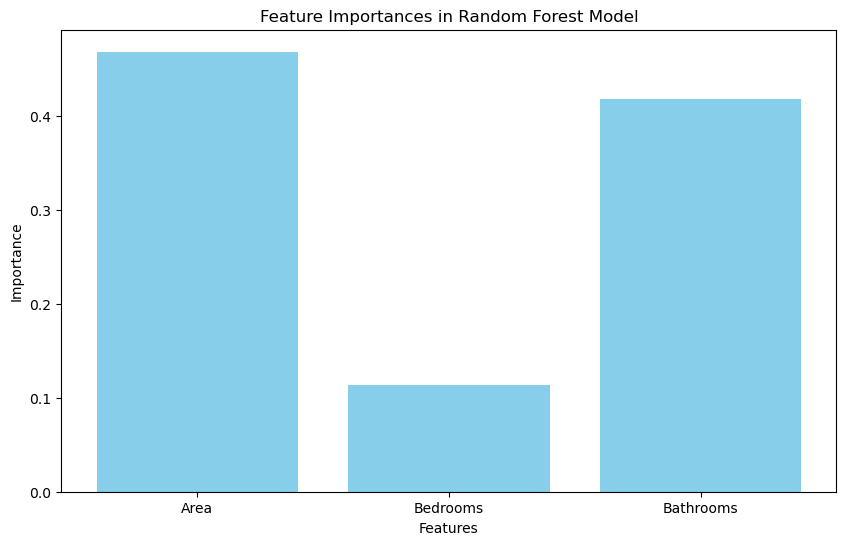

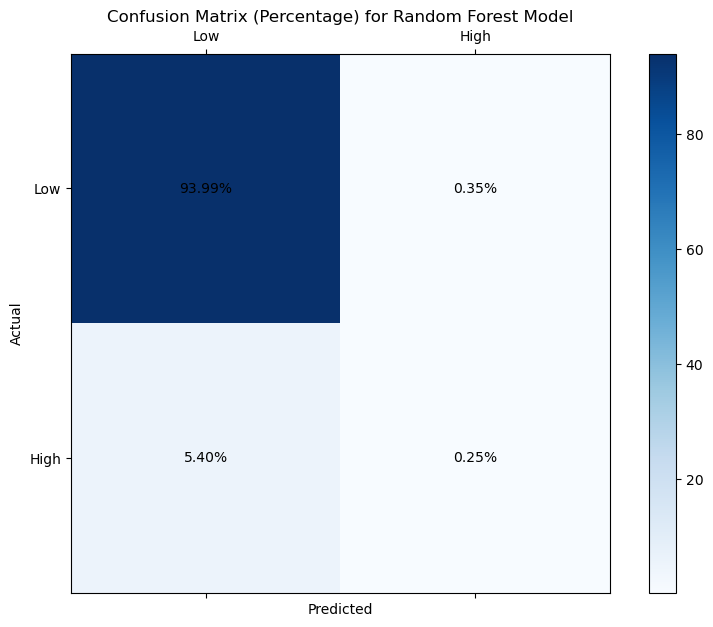

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Giả sử clean_data là DataFrame đã được làm sạch
clean_data = pd.read_csv('cleaned_data.csv')

# Chọn các đặc trưng (features)
X = clean_data[['Area', 'Bedrooms', 'Bathrooms']]

# Chọn biến mục tiêu (target)
y = clean_data['Price']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kích thước của X = X_train + X_test
print("Size of X:", X.shape)
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)

# Tạo mô hình Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
random_forest_model.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred = random_forest_model.predict(X_test)

# Chuyển đổi giá trị thực tế và giá trị dự đoán thành các categories Low và High
threshold = 100  # Ngưỡng để chia thành hai nhóm, thay đổi giá trị này cho phù hợp với dữ liệu của bạn
price_labels = ['Low', 'High']
y_test_binned = pd.cut(y_test, bins=[-np.inf, threshold, np.inf], labels=price_labels)
y_pred_binned = pd.cut(y_pred, bins=[-np.inf, threshold, np.inf], labels=price_labels)

# Tạo DataFrame với các giá trị thực tế, giá trị dự đoán, 'Type', 'Time', 'Bedrooms', 'Bathrooms', và 'Area'
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Actual Price Category': y_test_binned,
    'Predicted Price Category': y_pred_binned,
    'Type': clean_data.loc[X_test.index, 'Type'].values,
    'Time': clean_data.loc[X_test.index, 'Time'].values,
    'Bedrooms': X_test['Bedrooms'].values,
    'Bathrooms': X_test['Bathrooms'].values,
    'Area': X_test['Area'].values
})

# In kích thước của X_test
print("Size of X_test:", X_test.shape)

# In DataFrame chứa giá trị thực tế, giá trị dự đoán, 'Type', 'Time', 'Bedrooms', 'Bathrooms', và 'Area'
print(results_df)

# Đánh giá mô hình bằng các chỉ số như RMSE và R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error (RMSE) for RandomForest on Test Data:", rmse)
print("R-squared (R2) for RandomForest on Test Data:", r2)

# Đánh giá mô hình bằng các chỉ số như accuracy, precision, recall, và F1-score trên categories
accuracy = accuracy_score(y_test_binned, y_pred_binned) * 100
precision = precision_score(y_test_binned, y_pred_binned, average='weighted') * 100
recall = recall_score(y_test_binned, y_pred_binned, average='weighted') * 100
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted') * 100

print("Accuracy for RandomForest on Test Data (Categories):", accuracy, "%")
print("Precision for RandomForest on Test Data (Categories):", precision, "%")
print("Recall for RandomForest on Test Data (Categories):", recall, "%")
print("F1-score for RandomForest on Test Data (Categories):", f1, "%")

# In ra tầm quan trọng của các đặc trưng
feature_importances = random_forest_model.feature_importances_
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature_name}, Importance: {importance}")

# Trực quan hóa tầm quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()
# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned, labels=price_labels)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp

conf_matrix_percent = np.array([[tn, fp], [fn, tp]]) / total * 100

# Vẽ ma trận nhầm lẫn theo FN FP TN TP và theo %
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_percent, cmap=plt.cm.Blues)
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(conf_matrix_percent):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center')

ax.set_xticklabels([''] + price_labels)
ax.set_yticklabels([''] + price_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage) for Random Forest Model')
plt.show()


### MOVING AVERAGE

Size of train_data: (62244, 9)
Size of test_data: (15561, 9)
       Actual Price  Predicted Price           Type        Time  Area  \
50155           7.5            25.00          House  30/01/2024    40   
50154          11.0            24.60          House  30/01/2024    30   
50153          11.0            24.90          House  30/01/2024    30   
50156           8.0            23.50          House  30/01/2024    15   
34527           4.5             8.40  Room for Rent  30/03/2024    30   
...             ...              ...            ...         ...   ...   
38003           4.3             7.62  Room for Rent  31/12/2023    30   
38002           5.7             7.66  Room for Rent  31/12/2023    25   
38008           7.0             7.26  Room for Rent  31/12/2023    18   
62275           0.0             5.50           Type        Time     0   
42399           0.0             3.40           Type        Time     0   

       Bedrooms  Bathrooms  
50155         1          1  
5015

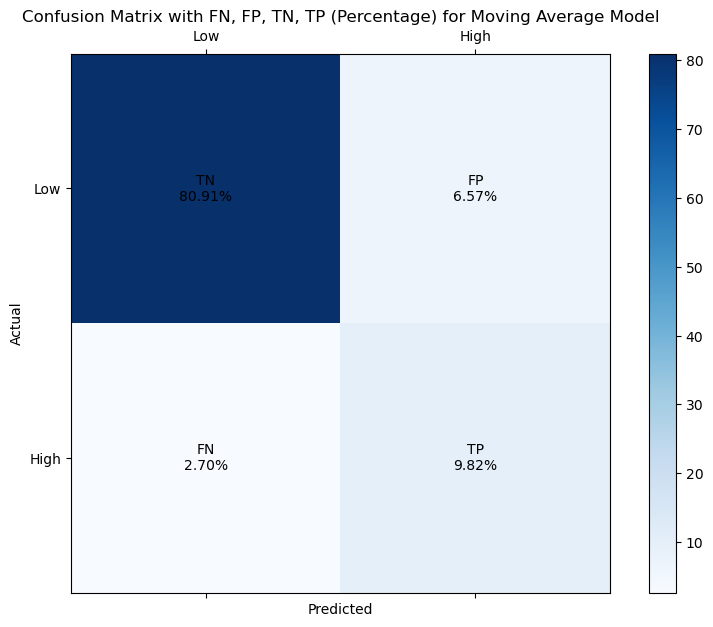

True Negatives (TN): 12591 (80.91%)
False Positives (FP): 1022 (6.57%)
False Negatives (FN): 420 (2.70%)
True Positives (TP): 1528 (9.82%)


In [73]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Giả sử clean_data là DataFrame đã được làm sạch
clean_data = pd.read_csv('cleaned_data.csv')

# Sort data by the 'Time' column
ma_data = clean_data.sort_values(by='Time')

# Select the 'Price' column as input data
price_data = ma_data['Price']

# Use a 5-day Moving Average to predict value
ma_period = 5
ma_data['MA'] = price_data.rolling(window=ma_period).mean()

# Remove rows with NaN values (because the initial MA values cannot be calculated)
ma_data = ma_data.dropna()

# Create training set and prediction set (test)
train_size = int(0.8 * len(ma_data))  # Use 80% of the data for the training set
train_data = ma_data.iloc[:train_size]
test_data = ma_data.iloc[train_size:]

# Print the size of the training and test sets
print("Size of train_data:", train_data.shape)
print("Size of test_data:", test_data.shape)

# Select the actual values on the test set
actual_values = test_data['Price']

# Select the predicted values from the 'MA' column on the test set
predicted_values = test_data['MA']

# Create a DataFrame with actual values, predicted values, 'Type', 'Time', 'Area', 'Bedrooms', 'Bathrooms'
results_df = pd.DataFrame({
    'Actual Price': actual_values,
    'Predicted Price': predicted_values,
    'Type': test_data['Type'].values,
    'Time': test_data['Time'].values,
    'Area': test_data['Area'].values,
    'Bedrooms': test_data['Bedrooms'].values,
    'Bathrooms': test_data['Bathrooms'].values
})

# Print the DataFrame containing actual values, predicted values, 'Type', 'Time', 'Area', 'Bedrooms', 'Bathrooms'
print(results_df)

# Evaluate the model using metrics such as RMSE and R-squared
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
r2 = r2_score(actual_values, predicted_values)
print("Root Mean Squared Error (RMSE) for Moving Average on Test Data:", rmse)
print("R-squared (R2) for Moving Average on Test Data:", r2)

# Convert actual and predicted values to categories (Low and High) for evaluation
threshold = 40  # Adjust threshold as needed
price_labels = ['Low', 'High']
actual_values_binned = pd.cut(actual_values, bins=[-np.inf, threshold, np.inf], labels=price_labels)
predicted_values_binned = pd.cut(predicted_values, bins=[-np.inf, threshold, np.inf], labels=price_labels)

# Evaluate the model using metrics such as accuracy, precision, recall, and F1-score
accuracy = accuracy_score(actual_values_binned, predicted_values_binned) * 100
precision = precision_score(actual_values_binned, predicted_values_binned, average='weighted') * 100
recall = recall_score(actual_values_binned, predicted_values_binned, average='weighted') * 100
f1 = f1_score(actual_values_binned, predicted_values_binned, average='weighted') * 100

print("Accuracy for Moving Average on Test Data (Categories):", accuracy, "%")
print("Precision for Moving Average on Test Data (Categories):", precision, "%")
print("Recall for Moving Average on Test Data (Categories):", recall, "%")
print("F1-score for Moving Average on Test Data (Categories):", f1, "%")

# Create confusion matrix
conf_matrix = confusion_matrix(actual_values_binned, predicted_values_binned, labels=price_labels)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp

# Convert confusion matrix to percentage
conf_matrix_percent = np.array([[tn, fp], [fn, tp]]) / total * 100

# Plot the confusion matrix with FN, FP, TN, TP and percentages
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_percent, cmap=plt.cm.Blues)
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(conf_matrix_percent):
    if i == 0 and j == 0:
        label = f'TN\n{val:.2f}%'
    elif i == 0 and j == 1:
        label = f'FP\n{val:.2f}%'
    elif i == 1 and j == 0:
        label = f'FN\n{val:.2f}%'
    else:
        label = f'TP\n{val:.2f}%'
    ax.text(j, i, label, ha='center', va='center', color='black')

ax.set_xticklabels([''] + price_labels)
ax.set_yticklabels([''] + price_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with FN, FP, TN, TP (Percentage) for Moving Average Model')
plt.show()

# Print TN, FP, FN, TP values and percentages
print(f"True Negatives (TN): {tn} ({tn/total:.2%})")
print(f"False Positives (FP): {fp} ({fp/total:.2%})")
print(f"False Negatives (FN): {fn} ({fn/total:.2%})")
print(f"True Positives (TP): {tp} ({tp/total:.2%})")


## COMPARE THREE MODELS LINEAR REGRESSION, MA AND RANDOMFOREST TO PREDICT HOUSE PRICES BASED ON ‘TIME’


### MOVING AVERAGE (MA)


Size of train_data: (62244, 9)
Size of test_data: (15561, 9)
Size of X_test: (15562, 1)
       Actual Price  Predicted Price           Type        Time
40910           3.9        24.151594  Room for Rent  11/11/2023
77733          11.0        27.579349      Apartment  01/06/2024
14150          16.0        27.579349      Apartment  01/06/2024
8363           35.0        43.254650          House  22/01/2024
47208          30.0        26.205078          House  03/05/2024
...             ...              ...            ...         ...
46890          20.0        30.428279          House  09/05/2024
48847         120.0        66.780794          House  23/03/2024
18779          13.5        27.579349      Apartment  01/06/2024
46173          35.0        22.025525          House  16/05/2024
12233          29.0        54.714054          House  19/11/2023

[15562 rows x 4 columns]
Mean Squared Error (MSE) for MA on Test Data: 349.1932729167535
Root Mean Squared Error (RMSE) for MA on Test Data: 18

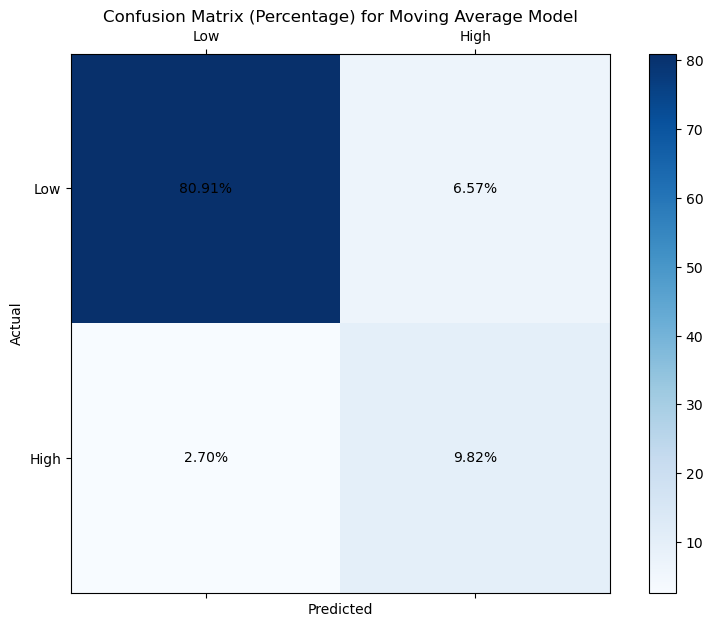

In [80]:
#With the MA model, the data used is just the Price column, sorted by Time for prediction
# Price làm giá trị dự đoán, Time là giá trị
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
# Sort data by time column (Time)
ma_data = clean_data.sort_values(by='Time')
# Select column 'Price' as input data
price_data = ma_data['Price']
# Use 5-day MA to predict value
ma_period = 5
ma_data['MA'] = price_data.rolling(window=ma_period).mean()
# Remove lines with NaN values (because the original MA cannot be calculated)
ma_data = ma_data.dropna()
# Create training set and prediction set (test)
train_size = int(0.8 * len(ma_data)) # Use 80% of the data for training set
train_data = ma_data.iloc[:train_size]
test_data = ma_data.iloc[train_size:]
# Size of X = X_train + X_test
print("Size of train_data:", train_data.shape)
print("Size of test_data:", test_data.shape)
# Select the actual value on the prediction set
actual_values = test_data['Price']
# Select the predicted value from column 'MA' on the prediction set
predicted_values = test_data['MA']
# Create a DataFrame with actual values, predicted values, 'Type', 'Time'
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred,'Type': clean_data.loc[X_test.index, 'Type'].values, 
                               'Time': clean_data.loc[X_test.index, 'Time'].values})
# Print the size of X_test
print("Size of X_test:", X_test.shape)
# Print the DataFrame containing actual values, predicted values, 'Type', 'Time'
print(results_df)
# Calculate MSE and RMSE
mse = np.mean((actual_values - predicted_values) ** 2)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE) for MA on Test Data:", mse)
print("Root Mean Squared Error (RMSE) for MA on Test Data:", rmse)

# Đánh giá mô hình bằng các chỉ số như accuracy, precision, recall, và F1-score trên categories
accuracy = accuracy_score(y_test_binned, y_pred_binned) * 100
precision = precision_score(y_test_binned, y_pred_binned, average='weighted') * 100
recall = recall_score(y_test_binned, y_pred_binned, average='weighted') * 100
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted') * 100

print("Accuracy for MovingAverage on Test Data (Categories):", accuracy, "%")
print("Precision for MovingAverage on Test Data (Categories):", precision, "%")
print("Recall for MovingAverage on Test Data (Categories):", recall, "%")
print("F1-score for MovingAverage on Test Data (Categories):", f1, "%")

# Vẽ ma trận nhầm lẫn theo FN FP TN TP và theo %
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_percent, cmap=plt.cm.Blues)
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(conf_matrix_percent):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center')

ax.set_xticklabels([''] + price_labels)
ax.set_yticklabels([''] + price_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage) for Moving Average Model')
plt.show()

### RANDOM FOREST

0    01/06/2024
1    01/06/2024
2    01/06/2024
3    01/06/2024
4    01/06/2024
Name: Time, dtype: object
       Type  Room Name  Price  Location Time  Area  Bedrooms  Bathrooms
62275  Type  Room Name    0.0  Location  NaT     0         0          0
42399  Type  Room Name    0.0  Location  NaT     0         0          0
Size of X: (77807, 1)
Size of X_train: (62245, 1)
Size of X_test: (15562, 1)
Size of X_test: (15562, 1)
       Actual Price  Predicted Price           Type        Time
40910           3.9        24.151594  Room for Rent  11/11/2023
77733          11.0        27.579349      Apartment  01/06/2024
14150          16.0        27.579349      Apartment  01/06/2024
8363           35.0        43.254650          House  22/01/2024
47208          30.0        26.205078          House  03/05/2024
...             ...              ...            ...         ...
46890          20.0        30.428279          House  09/05/2024
48847         120.0        66.780794          House  23/03/202

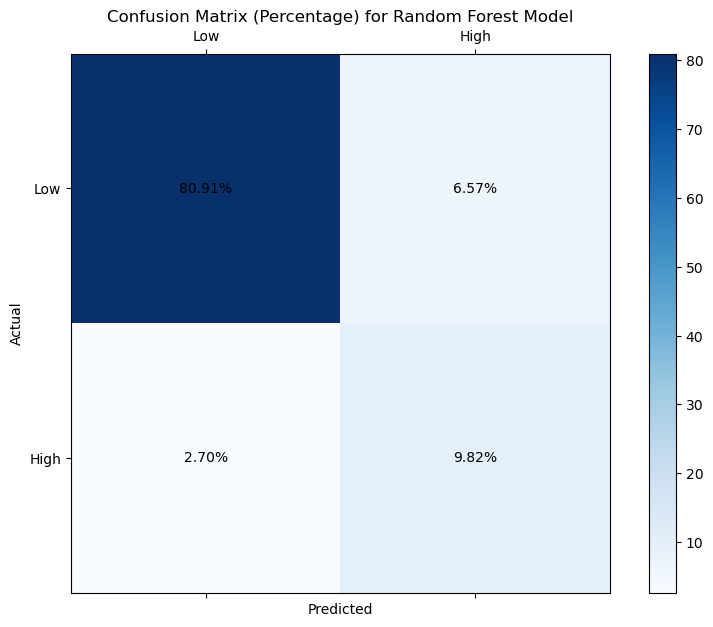

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
import numpy as np

# Giả sử clean_data là DataFrame đã được làm sạch
clean_data = pd.read_csv('cleaned_data.csv')

# Kiểm tra định dạng ban đầu của cột Time
print(clean_data['Time'].head())

# Sắp xếp dữ liệu theo cột thời gian (Time)
rf = clean_data.sort_values(by='Time')

# Chuyển đổi giá trị thời gian thành định dạng datetime
rf['Time'] = pd.to_datetime(rf['Time'], format='%d/%m/%Y', errors='coerce')

# Kiểm tra các giá trị NaT (nếu có)
print(rf[rf['Time'].isna()])

# Loại bỏ các hàng có giá trị NaT trong cột Time sau khi chuyển đổi
rf = rf.dropna(subset=['Time'])

# Chuyển đổi cột Time sang định dạng số nguyên YYYYMMDD
rf['Time'] = rf['Time'].dt.strftime('%Y%m%d').astype(int)

# Chọn cột 'Price' làm biến phụ thuộc (target) và các biến độc lập (features)
X = rf[['Time']]  # Thêm các biến độc lập cần sử dụng
y = rf['Price']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kích thước của X = X_train + X_test
print("Size of X:", X.shape)
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)

# Tạo mô hình Random Forest
random_forest_time_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
random_forest_time_model.fit(X_train, y_train)

# Dự đoán giá trên tập kiểm tra
y_pred = random_forest_time_model.predict(X_test)

# Tạo DataFrame với các giá trị thực tế, giá trị dự đoán, 'Type', 'Time'
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Type': clean_data.loc[X_test.index, 'Type'].values,
    'Time': clean_data.loc[X_test.index, 'Time'].values
})

# In kích thước của X_test
print("Size of X_test:", X_test.shape)

# In DataFrame chứa giá trị thực tế, giá trị dự đoán, 'Type', 'Time'
print(results_df)

# Tính toán MSE và RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE) for Random Forest on Test Data:", mse)
print("Root Mean Squared Error (RMSE) for Random Forest on Test Data:", rmse)

# In ra tầm quan trọng của các đặc trưng
feature_importances = random_forest_time_model.feature_importances_
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature_name}, Importance: {importance}")
# Đánh giá mô hình bằng các chỉ số như accuracy, precision, recall, và F1-score trên categories
accuracy = accuracy_score(y_test_binned, y_pred_binned) * 100
precision = precision_score(y_test_binned, y_pred_binned, average='weighted') * 100
recall = recall_score(y_test_binned, y_pred_binned, average='weighted') * 100
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted') * 100

print("Accuracy for RandomForest on Test Data (Categories):", accuracy, "%")
print("Precision for RandomForest on Test Data (Categories):", precision, "%")
print("Recall for RandomForest on Test Data (Categories):", recall, "%")
print("F1-score for RandomForest on Test Data (Categories):", f1, "%")
# Vẽ ma trận nhầm lẫn theo FN FP TN TP và theo %
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_percent, cmap=plt.cm.Blues)
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(conf_matrix_percent):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center')

ax.set_xticklabels([''] + price_labels)
ax.set_yticklabels([''] + price_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage) for Random Forest Model')
plt.show()

#### RANDOM FOREST MODEL

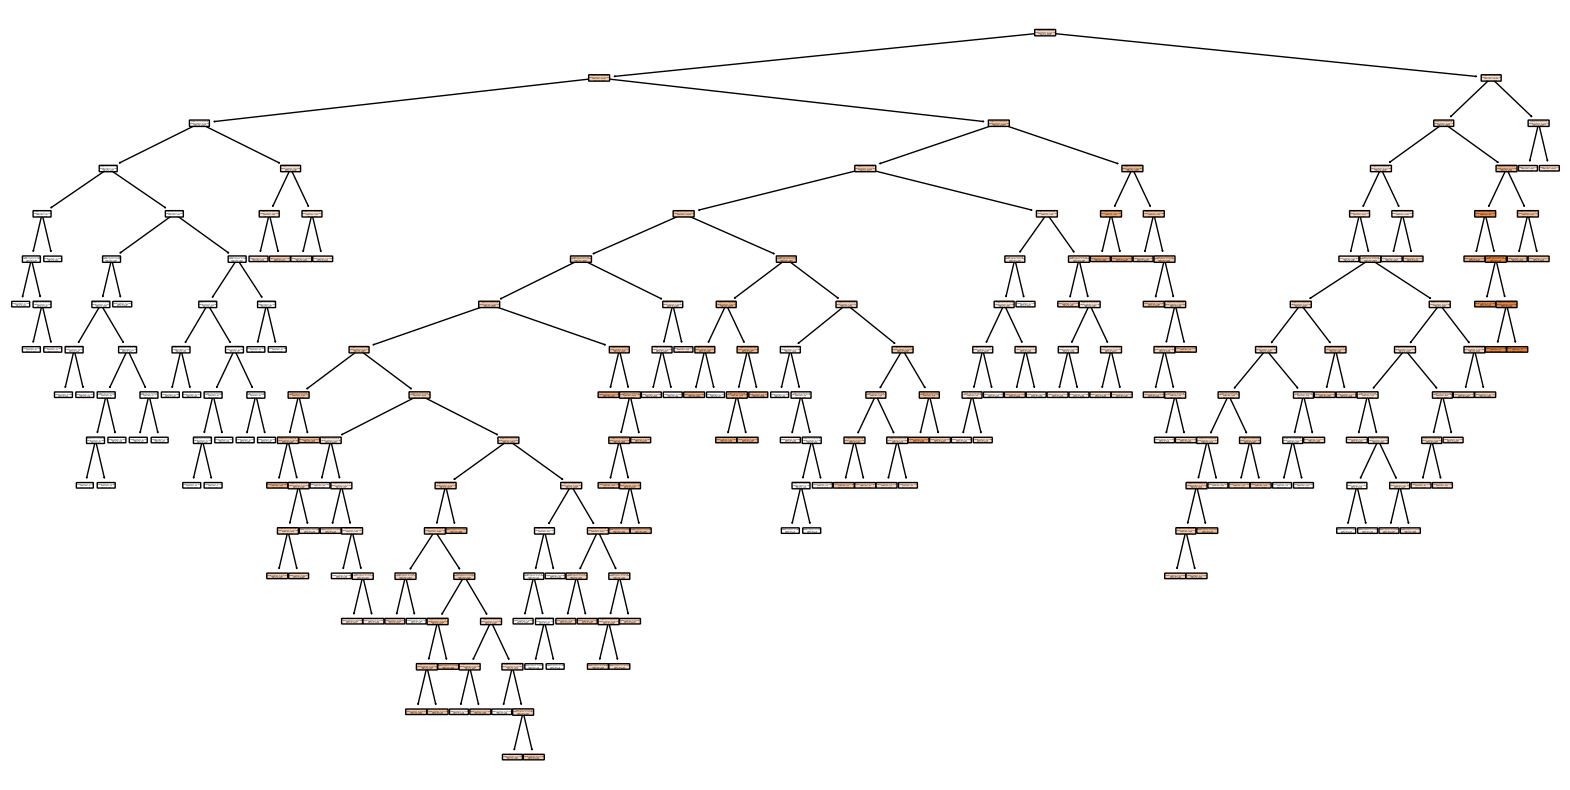

In [45]:
# Select a tree from the forest (e.g. first tree)
chosen_tree = random_forest_time_model.estimators_[0]
# Draw a decision tree
plt.figure(figsize=(20,10)) # Set the size for the figure
plot_tree(chosen_tree,
filled=True,
feature_names=X.columns,
rounded=True,
proportion=False,
precision=2)
plt.show()
